# データ分析実践手法, データアントレプレナー実践論@電気通信大学 (2016/10/31)
## 自己紹介
* 早川　敦士
* 2015年3月: 電気通信大学大学院 総合情報学専攻 修士卒
* 2015年4月: 株式会社リクルートコミュニケーションズ　入社

活動例
* Japan.R 2016 運営 (http://japanr.net)
* 技術評論社よりデータサイエンティスト養成読本を共著にて出版
* {githubinstall}, {addin4githubinstall}の開発, 世界中のR言語のパッケージをリスト化(http://rpkg.gepuro.net)

自身の昔話とデータ分析業界の流れ
* 2001年: 小学5年生頃にプログラミングに出会い、PCゲームを作る
* 2004年: ウェブサイトを作ったり、ゲームを公開する。
* 2005年: 中3の頃にオープンキャンパスで人工知能を知り、興味を持つ
* 2006年~2008年: 好きな事を学ぶには学力が足り無さすぎたので、高校の勉強に励む
* 2009年: プログラミングの勉強を再開する。この頃からクラウドが流行る
* 2010年: 大学入学後の学部2年より、機械学習の勉強を始める。
* 2011年:「ビッグデータ」という言葉が広がりはじめて、データ分析エンジニアと呼ばれる人が生まれてきて、興味を増す
* 2012年: 分析コミュニティ内で仕事内容や役割についての議論で盛り上がるなか、データサイエンティストが米ハーバード・ビジネス・レビューでデータサイエンティストを「21世紀で最もセクシーな職業」と紹介される。
* 2013年: データサイエンティスト養成読本を執筆(Python2系)
* 2015年: 現職へ入社
* 2016年: データサイエンティスト養成読本の改訂版を執筆(Python3系)

## 講義の狙い
公開されているデータの分析を通して、実務での分析案件で使われることの多い手法を体感する。

## 進め方
受講者と双方向にディスカッションをしながら、データ分析をしていく
（様子を見て、ハンズオン形式or講義形式に変更する可能性あり）

# データの取得
## 利用するデータセット
http://archive.ics.uci.edu/ml/ にある「Wine Quality( http://archive.ics.uci.edu/ml/datasets/Wine+Quality )」というデータセットを用いる。

## ダウンロード
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ よりダウンロード

 * winequality-red.csv: 赤ワインのデータ
 * winequality-white.csv: 白ワインのデータ
 * winequality.names: データの説明
 
## データの概要
 * ポルトガルの赤ワインと白ワインに関するデータ
 * 物理化学的な情報(入力値)と感覚による情報(出力値)

 * カラム
   * 1 - fixed acidity (酒石酸濃度) 
   * 2 - volatile acidity (酢酸濃度)
   * 3 - citric acid (クエン酸濃度)
   * 4 - residual sugar (残留糖分濃度)
   * 5 - chlorides (塩化ナトリウム濃度)
   * 6 - free sulfur dioxide (遊離亜硫酸濃度)
   * 7 - total sulfur dioxide (総亜硫酸濃度)
   * 8 - density (密度)
   * 9 - pH
   * 10 - sulphates (硫酸カリウム濃度) 
   * 11 - alcohol (アルコール度数)
   * 12 - quality (score between 0 and 10) (ワインの質, これを予測したい)

## 他の人の分析例
 * ワインの味（美味しさのグレード）は予測できるか？（１）, http://sudillap.hatenablog.com/entry/2013/04/27/203200
 * ワインの味（美味しさのグレード）は予測できるか？（２）, http://sudillap.hatenablog.com/entry/2013/04/27/204140
 * データサイエンスでワインの味の評価を予測したい, http://tjo.hatenablog.com/entry/2015/10/23/190000

先人たちの分析はとても参考になります。

# 環境構築
https://www.continuum.io/downloads から Python 3.5 versionをインストール
Windowsの人もMacの人もANACONDAからのインストールが簡単です。

In [1]:
# ライブラリの読み込み
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
# グラフをインラインで表示させる
%matplotlib inline

# Pandasでデータを読み込む
Pandasはデータの入出力や加工が便利になるライブラリです。
データフレームという考え方があり、Excelのピボットテーブルのように集計や、より複雑な加工が出来ます。

In [2]:
redwine = pd.read_csv("../data/wine-quality/winequality-red.csv", delimiter=";") 

read_csv()でデータの読み込みをする。
また、delimiterで区切り文字を指定する。デフォルトでは","。

In [4]:
redwine.head(10)  # 先頭の5行を取り出す

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# <font color="red">ここまでは講義開始前に実行出来ることを確認してもらえるとスムーズに進行できるので助かります。以降は講義中でも構いません</font>

## 分析案件の対応方法
### 記述統計(資料の前半はこれです）
 * SQLやエクセルなどで集計したりグラフにする事で、ビジネスへの理解を深めて次に繋げる

### 教師有り学習(今回のケース)
下のどちらがゴールになるかを初めに意思疎通しておくと良い。

 * 解釈可能なモデルを提案して、ワインの製造過程にアドバイス
 * 高精度で予測して、ワインの質(価格)を予想する

### 教師無し学習
最終的な利用方法を十分に検討しないと努力が報われなくなってしまう。

 * データの背景を深く理解して、利用しやすい形式でクラスタリングする

### 強化学習
シミューレションや実験が必要

 * 囲碁AIや将棋AIは強化学習が重要
 * 多腕バンディットでwebページの改善をする場合


# 集計でデータの理解をする

## 平均
 * $\bar{x} = \frac{1}{n} \sum_{i=1}^{n}{x_i}$

In [249]:
redwine.mean()  # 平均

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

## 標本分散と標本標準偏差
 * 標本分散
   * $\sigma^2$
 * 標本標準偏差
   * $\sigma$

$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} ( x_i - \bar{x} )^2$

In [250]:
redwine.std()  # 標準偏差

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

### 記述統計をまとめて出力

In [5]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### quality毎に変数の平均を求める

In [6]:
redwine.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# グラフでデータの理解をする

## ワインの質のヒストグラム
データの分布を読み取る

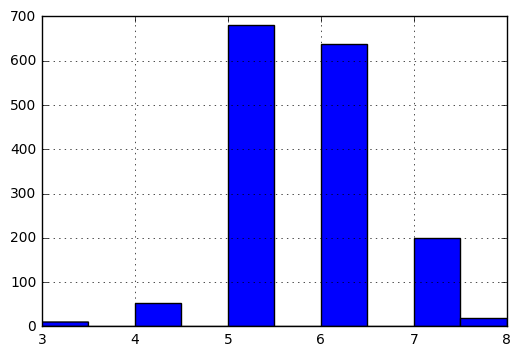

In [7]:
redwine["quality"].hist()

## ワインの質の円グラフ
好みの問題ですが、ヒストグラムの方がグラフを読みやすいです

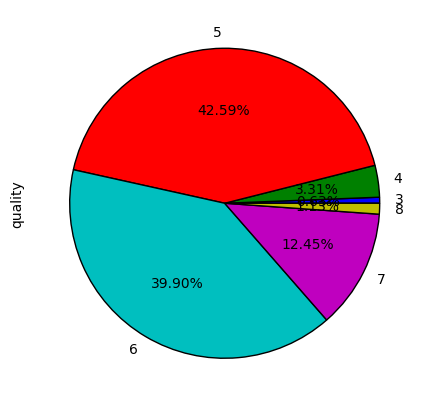

In [8]:
redwine.groupby(by="quality").size().plot(kind="pie", figsize=(5, 5), autopct='%.2f%%', label="quality", sort_columns=True)

## 散布図
2変量のデータを可視化する時の定番

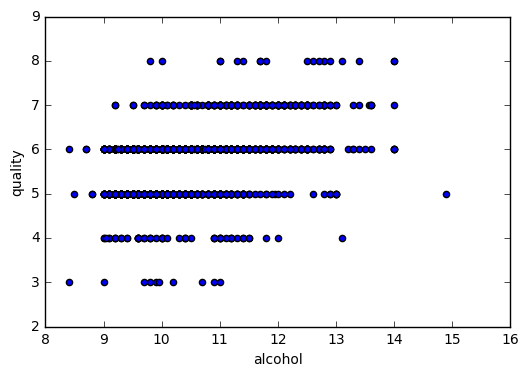

In [9]:
redwine.plot(kind='scatter', x="alcohol", y="quality")

## 箱ひげ図
株価チャートなどで見かけることの多い図です。
小さい画面に多くの情報量を載せられるので利便性が高いです。
参考: https://ja.wikipedia.org/wiki/箱ひげ図 , http://www.stat.go.jp/koukou/howto/process/graph/graph5.htm

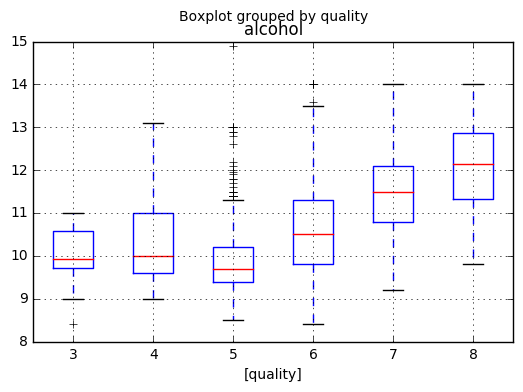

In [10]:
redwine[["alcohol", "quality"]].boxplot(column=["alcohol"], by=["quality"])

## 散布図行列
カラム数が増えてくると画面が潰れてしまいますが、分析にとりかかる前に見ておきたいグラフの一つ

### 注目ポイント
 * 相関が高い変数
 * 外れ値
 * 特徴的な傾向のある変数のペア
 * 各変数のヒストグラムに明らかな傾向がないか
   * ある値より大きい所で打ち切られている
   * スパイクしていないか
 * など


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107457b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e3e1b70>]], dtype=object)

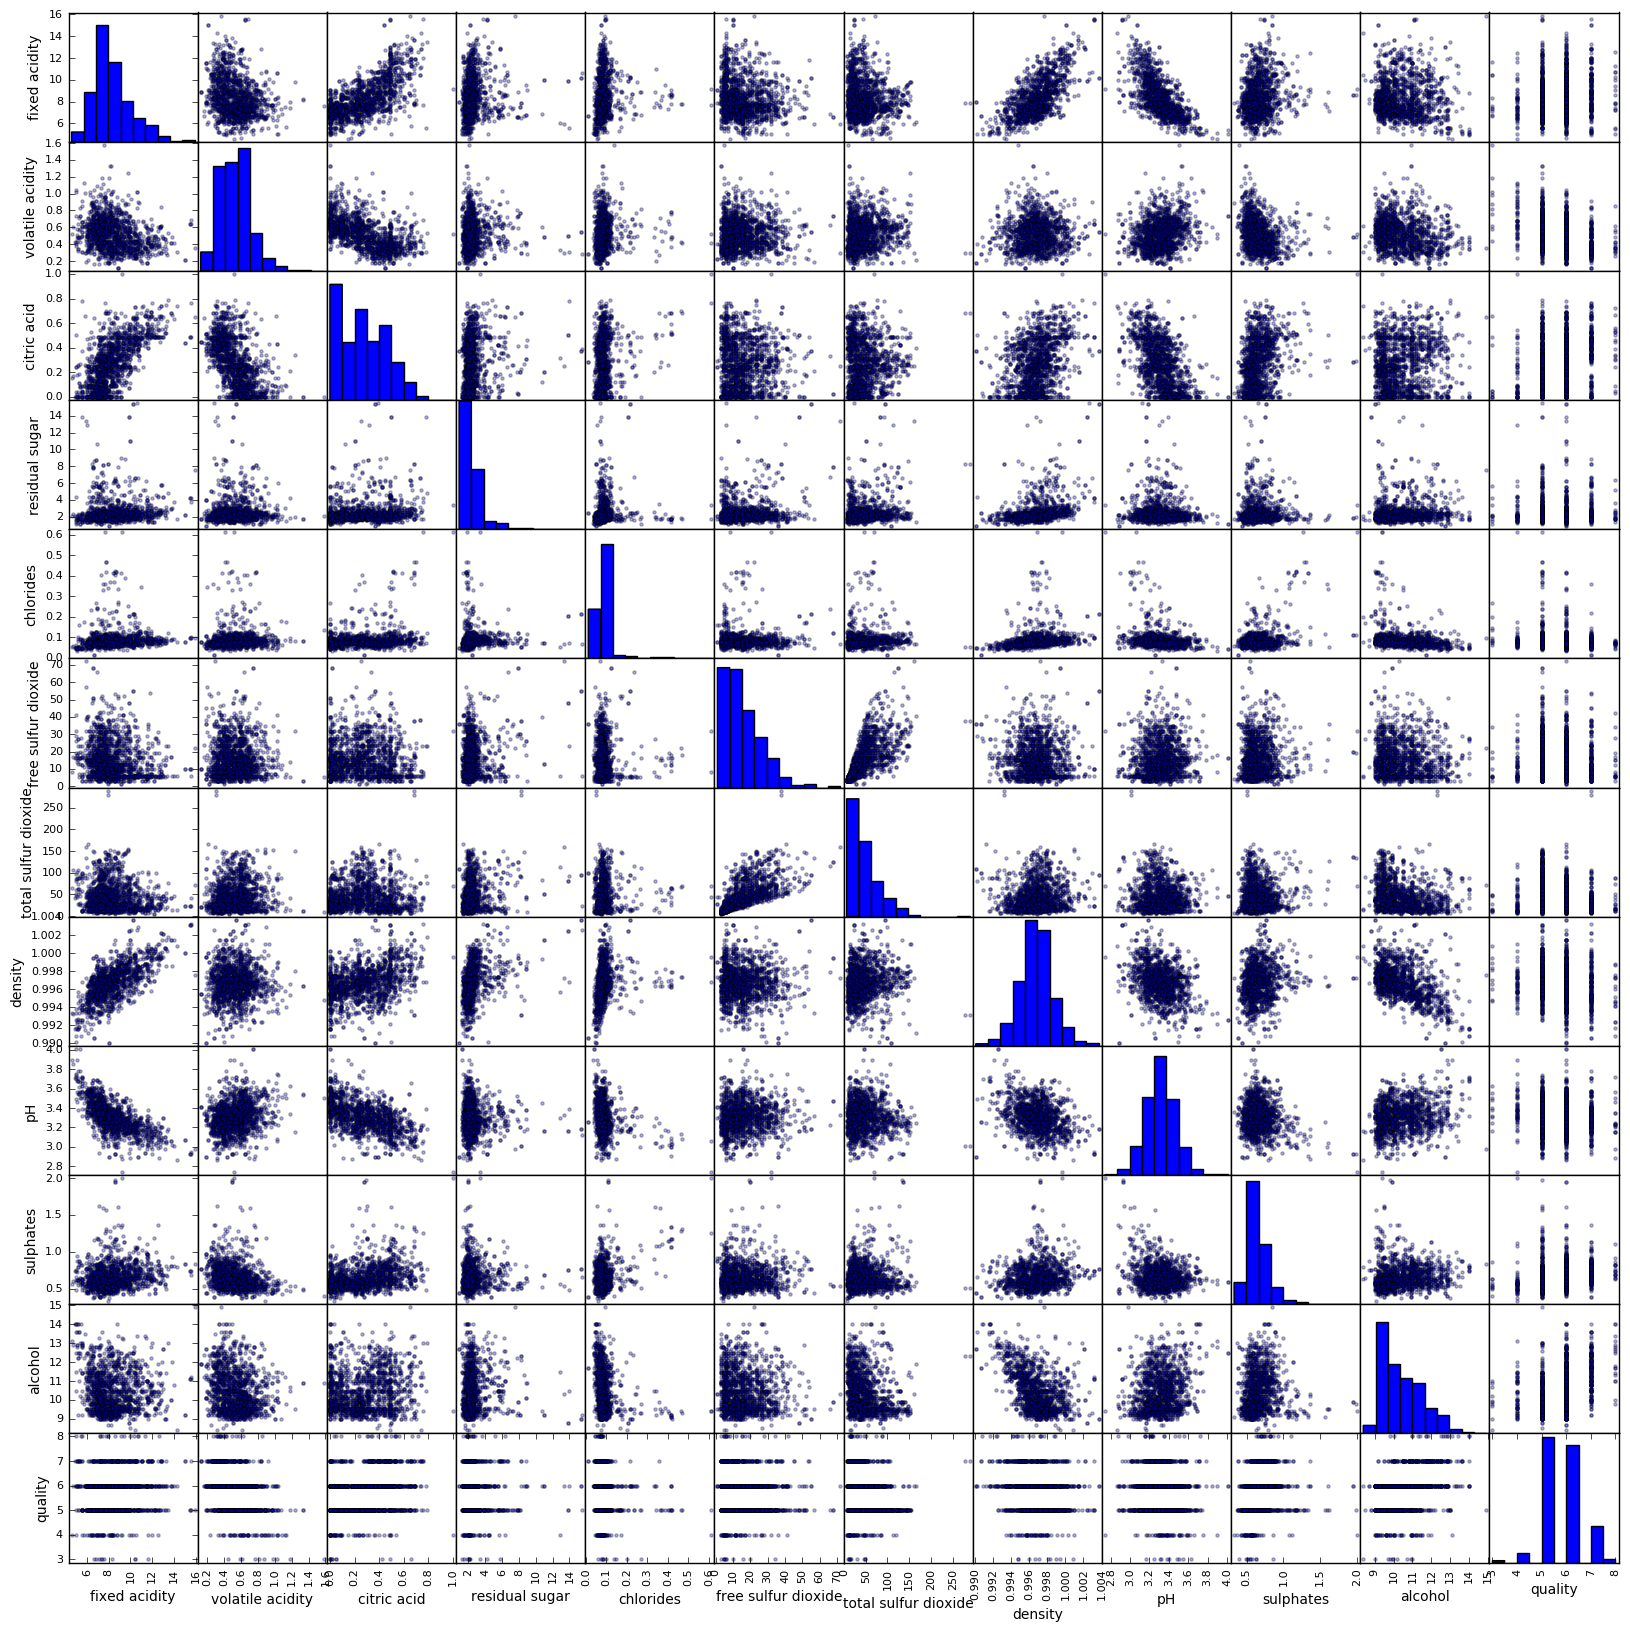

In [12]:
pd.scatter_matrix(redwine, alpha=0.3, figsize=(20, 20))

## 箱ひげ図を並べる
表示の都合上、各変数を標準化(平均を0,分散を1に)しています。

ワインの質ごとに可視化しているので、ワイン質と他の変数との関係が散布図行列より読み取りやすくなる。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f0e5780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1107a4b70>]], dtype=object)

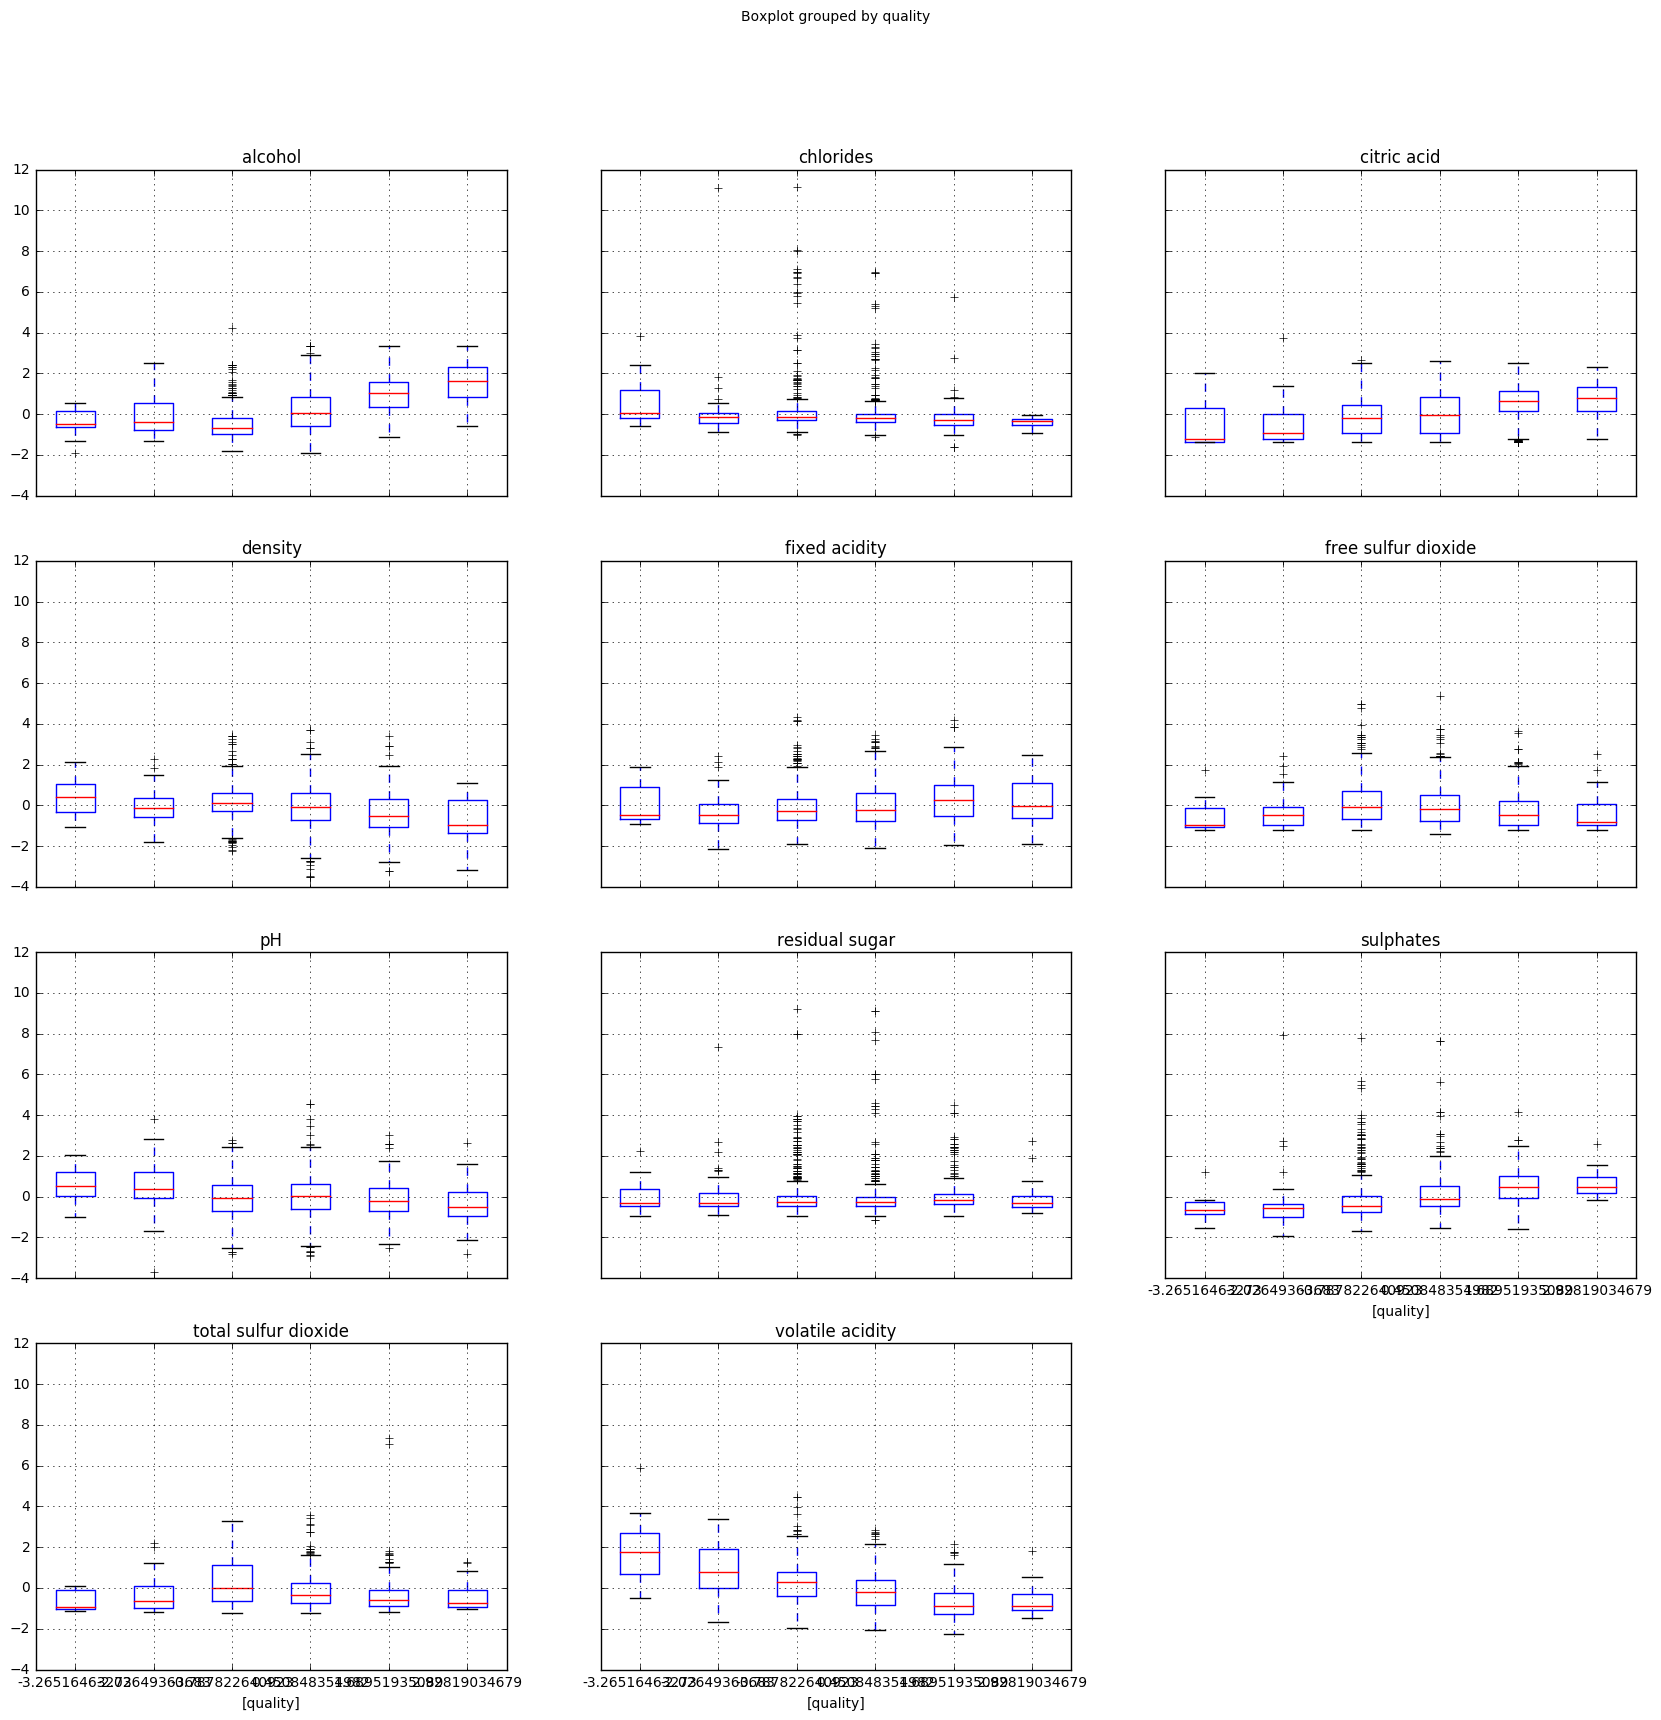

In [13]:
redwine.apply(lambda x: (x - np.mean(x))/np.std(x)).boxplot(by=["quality"], figsize=(20,20))

ここまでは、単変量もしくは2変量の関係を見てきた。
以降ではそれ以上の多変量でデータを理解する。

# 解釈しやすいモデリング
## ワインの質が"低い" or "高い"
qualityが5以下 or 5より大きいをモデリングする。
結果を見やすくするために、初めは変数を2つにする

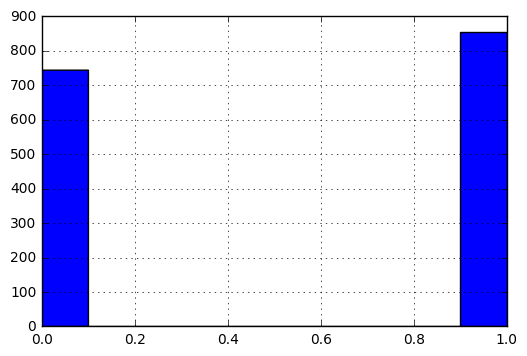

In [259]:
redwine["quality_low_high"] = redwine["quality"] > 5
x_columns = ['fixed acidity', 'volatile acidity']
redwine.quality_low_high.hist()

### 決定木でモデリング

決定木は絵的に理解しやすいので使われることが多い。
分類したいデータを分割していくモデル

In [260]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(redwine[x_columns], redwine["quality_low_high"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

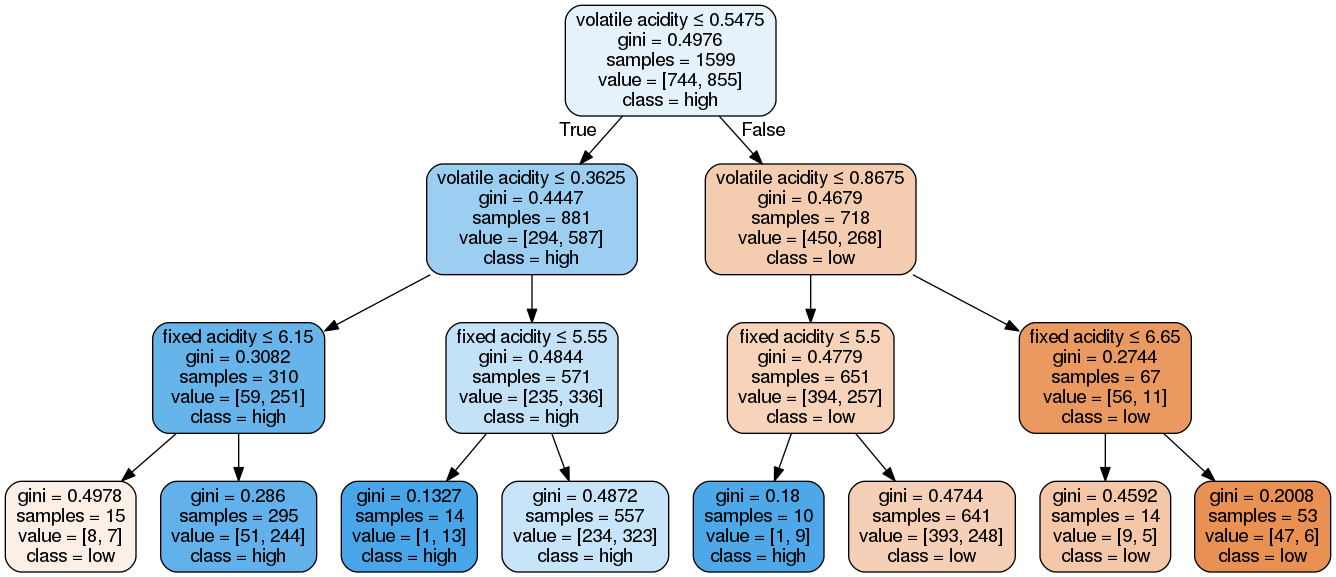

In [261]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### 2変数で決定境界を描く

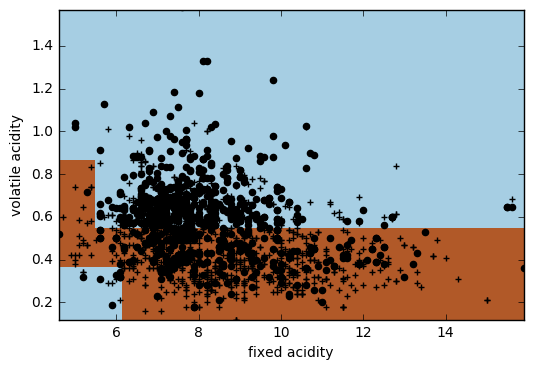

In [262]:
X = redwine[x_columns]
xMin = redwine[x_columns[0]].min()
xMax = redwine[x_columns[0]].max()
yMin = redwine[x_columns[1]].min()
yMax = redwine[x_columns[1]].max()
target = redwine["quality_low_high"]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, target)
xx,yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(x_columns[0])
plt.ylabel(x_columns[1])
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(redwine[x_columns[0]].ix[target.values==False], redwine[x_columns[1]].ix[target.values==False], marker="o", c="black")
plt.scatter(redwine[x_columns[0]].ix[target.values==True], redwine[x_columns[1]].ix[target.values==True], marker="+", c="black")

#### クロスバリデーションでパラメータを決める
決定木でモデリングする時は木を深さを予め決定する必要がある。
これを予測精度が高くなるように決めると良い。

そのためにクロスバリデーションという手法を利用する。
クロスバリデーションでは、データセットをn分割し、n-1個で学習させ残りの1個で予測し精度を確認する。これをn回繰り返して平均を求める。

![](http://homepages.inf.ed.ac.uk/pmartin/tutorial/_images/three-fold.png)
上図はhttp://homepages.inf.ed.ac.uk/pmartin/tutorial/case_studies.html より引用

下記のコードでは、木の深さを2から10まで変化させて、正解率(Accuracy)を比較している。

|  | 事実が1 | 事実が0 |
|:-----------:|:------------:|:------------:|
| 予測が1 | True Positive(TP) | False Positive(FP) |
| 予測が0 | False Negative(FN) | True Negative(TN) |

$$正解率(Accuracy) = \frac{TP + TN}{TP + FP + FN + TN}$$

2 0.63727468652
3 0.619106583072
4 0.61224137931
5 0.607846786834
6 0.605364420063
7 0.607878134796
8 0.599104623824
9 0.597838949843


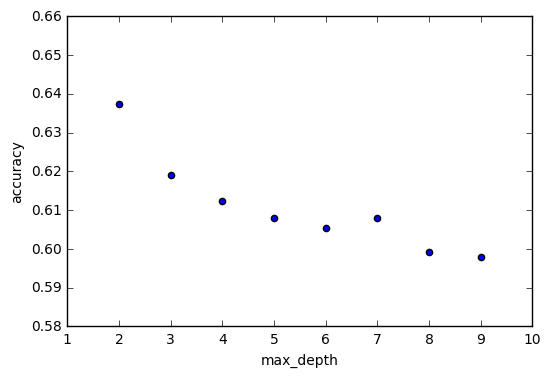

In [263]:
from sklearn.cross_validation import cross_val_score
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

#### 全変数でクロスバリデーションする

2 0.677292319749
3 0.687323667712
4 0.687948667712
5 0.705431034483
6 0.692915360502
7 0.691044278997
8 0.679792319749
9 0.665384012539


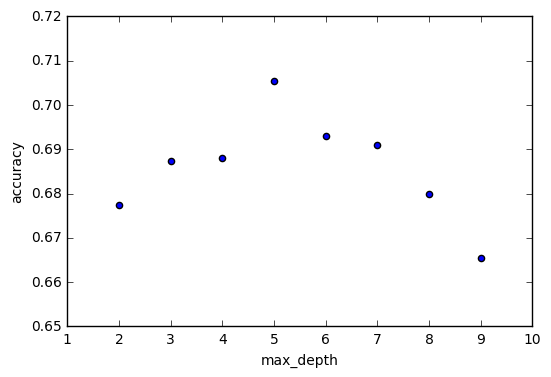

In [264]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

#### 決定木から変数の重要度を求める
##### Gini係数

今回の決定木では、Gini係数を基準にデータを分割している。

参考
 * http://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-213
 * https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx

Gini係数 $i(\tau) = 1 - p_1^2 - p_0^2$

ここで$\tau$はどのノードかを示し、$p_k = \frac{n_k}{n}$である。

##### Gini importance
$\Delta i(\tau) = i(\tau) - p_l i(\tau_l) - p_r i(\tau_r)$

ここで、$\tau_l$, $\tau_r$はノード$\tau$から分けられるノードを示す。

そして、変数$\theta$についての重要度は、$\sum_\tau \Delta i_{\theta}(\tau)$となる。

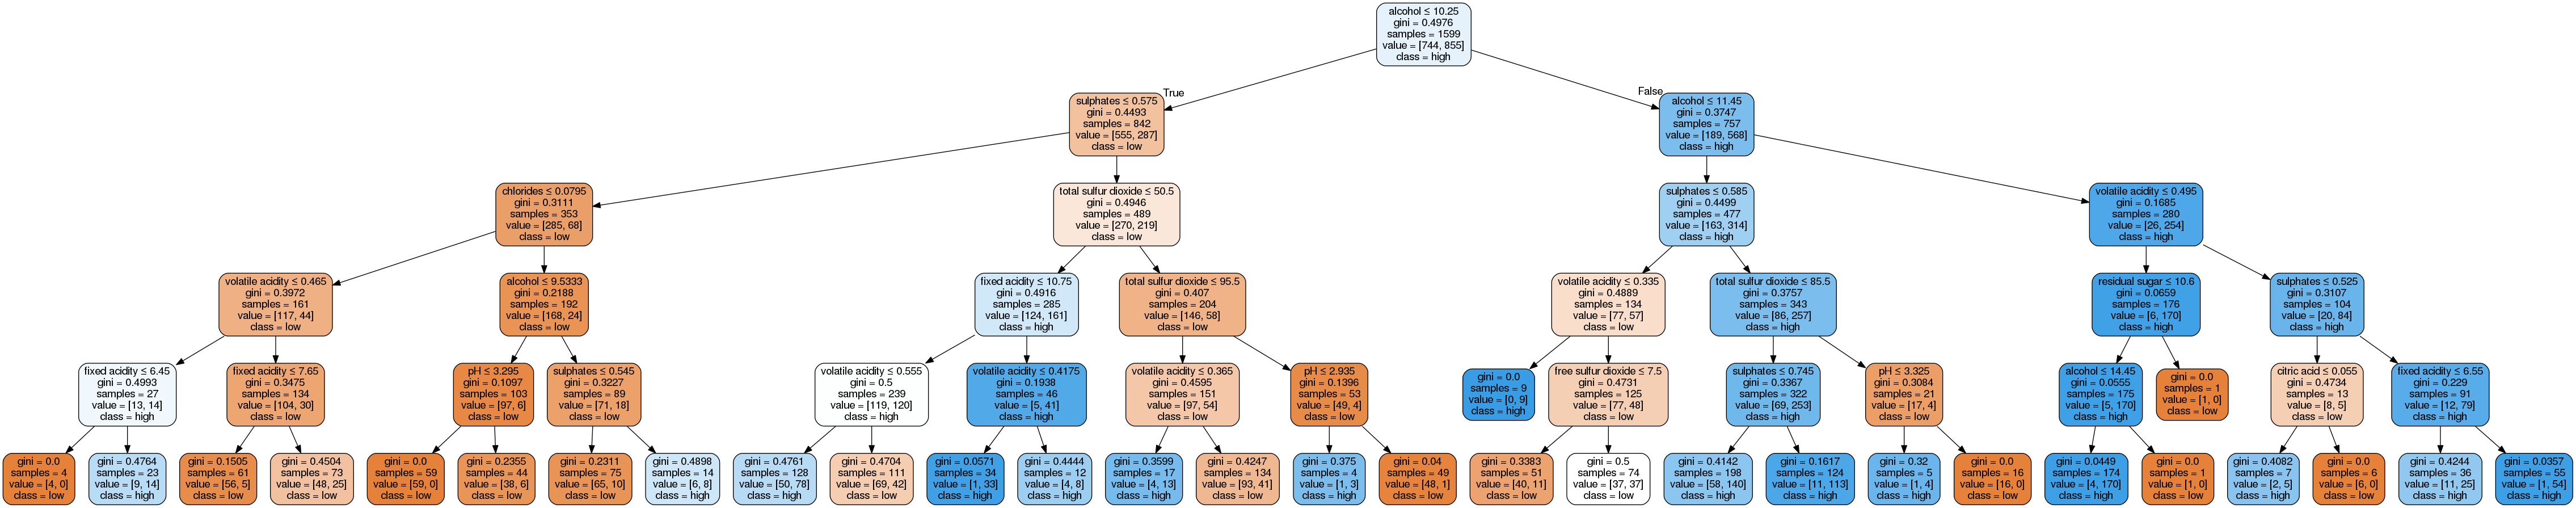

In [265]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(redwine[x_columns], redwine["quality_low_high"])
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

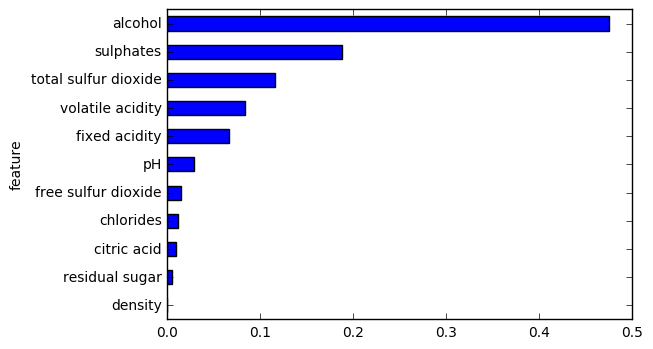

In [266]:
feature_importance = pd.DataFrame([i for i in zip(x_columns, clf.feature_importances_)])
feature_importance.columns = ["feature", "importance"]
feature_importance.sort_values("importance", ascending=True).plot(kind="barh", x="feature", y="importance",legend=False)

#### 上位2変数で再度モデリングする

2 0.675417319749
3 0.729827586207
4 0.714829545455
5 0.71668299373
6 0.68480799373
7 0.685423197492
8 0.676661442006
9 0.663532523511


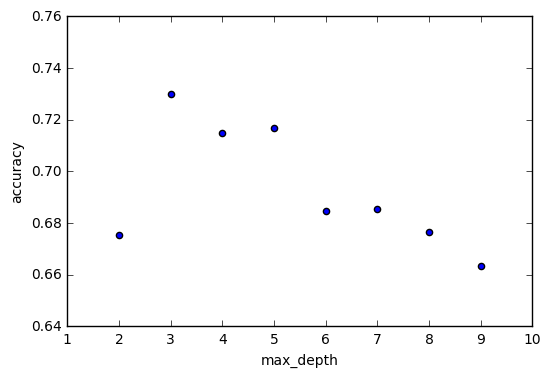

In [267]:
x_columns = ['sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

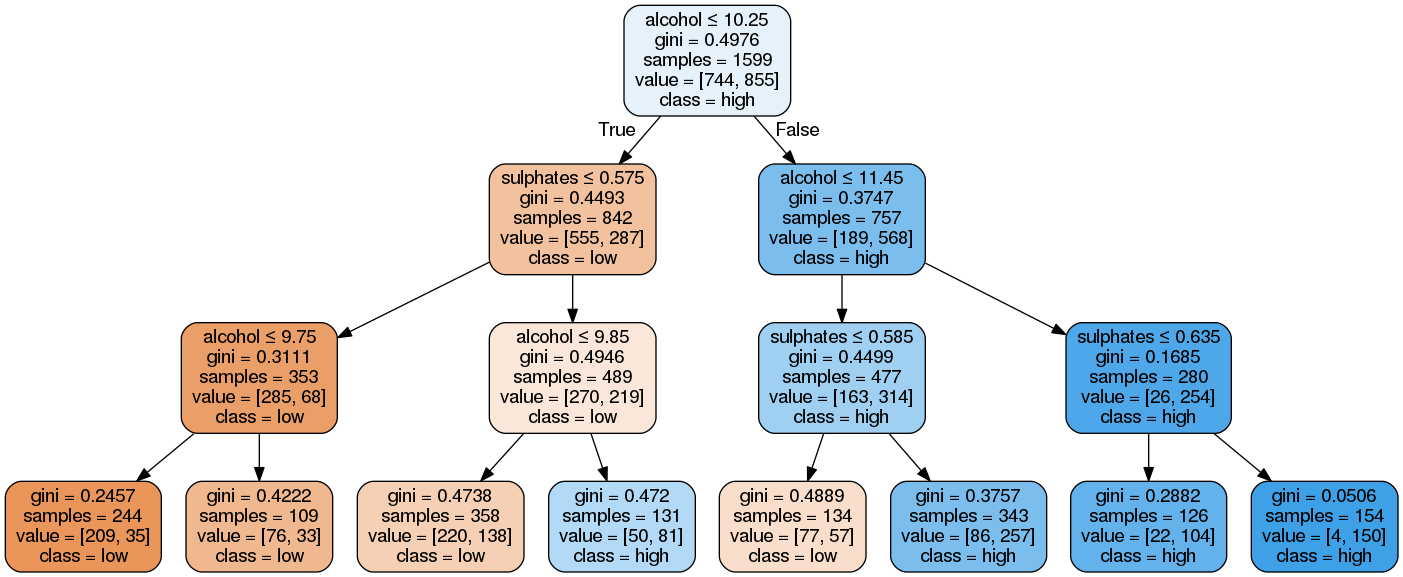

In [268]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(redwine[x_columns], redwine["quality_low_high"])
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

変数を絞ることで精度が向上する場合はある。

#### まとめ
決定木を用いてクロスバリデーションをしてパラメータを決めた。その際に求まった変数の重要度を用いて、再度決定木にかけることによて、予測精度を上げることができた。ワインの質が低い(以下)もしくは高い(5より大きい)であれば、70%程度の正解率で予測することが出来る。また、ワインの質には、アルコール濃度と硫酸カリウム濃度が需要なことが分かった。特にアルコール濃度が重要で10.25以上の場合にワインの質が高くなる。


### ロジスティック回帰でモデリング
$$logit(p_i) = \ln(\frac{p_i}{1-p_i}) = \alpha + \beta_1 x_{1,i} + \cdots + \beta_k x_{k,i}$$

* ${p_i}$: データiのワインが高品質な確率
* $logit(p_i)$: 対数オッズ(ロジット)
* ${x}$: 説明変数
* ${\beta}$: 偏回帰係数
* ${\alpha}$: 切片

変数が$x_k$大きくなると、対数オッズが $x_k * \beta_k$大きくなるようなモデル

#### 確率$p$と対数オッズ

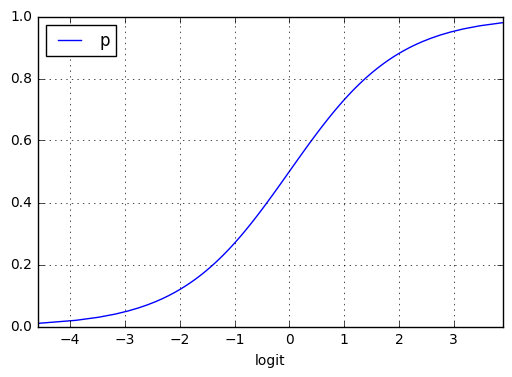

In [269]:
p = np.arange(0.01, 0.99, 0.01)
logit = np.log(p/(1-p))
pd.DataFrame.from_dict({"logit":logit, "p":p}).plot(kind="line", x="logit", y="p", grid=True)

#### 2つの変数でモデリングしてみる

In [270]:
from sklearn.linear_model import LogisticRegression
x_columns = ['sulphates', 'alcohol']
LogReg = LogisticRegression()
LogReg.fit(redwine[x_columns], redwine["quality_low_high"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### 決定境界を描く

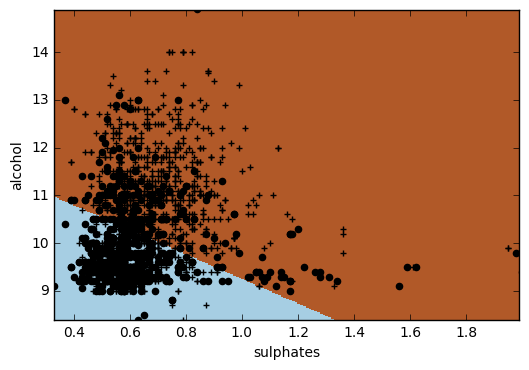

In [271]:
X = redwine[x_columns]
xMin = redwine[x_columns[0]].min()
xMax = redwine[x_columns[0]].max()
yMin = redwine[x_columns[1]].min()
yMax = redwine[x_columns[1]].max()
target = redwine["quality_low_high"]
LogReg = LogisticRegression()
LogReg.fit(X, target)
xx,yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(x_columns[0])
plt.ylabel(x_columns[1])
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(redwine[x_columns[0]].ix[target.values==False], redwine[x_columns[1]].ix[target.values==False], marker="o", c="black")
plt.scatter(redwine[x_columns[0]].ix[target.values==True], redwine[x_columns[1]].ix[target.values==True], marker="+", c="black")

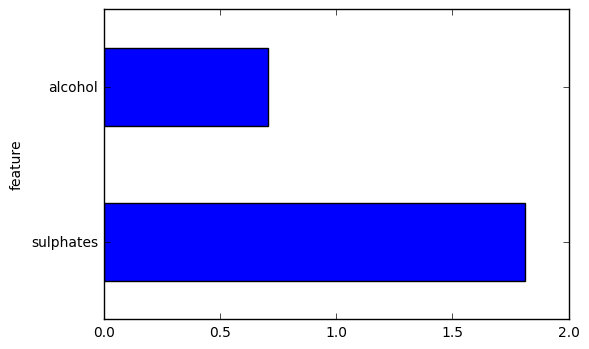

In [272]:
feature_coef = pd.DataFrame([i for i in zip(x_columns, LogReg.coef_[0])])
feature_coef.columns = ["feature", "coef"]
feature_coef.plot(kind="barh", x="feature", y="coef",legend=False)

alcohol、sulphatesが高いほど対数ロジットが大きくなる。

##### クロスバリデーション

In [273]:
cross_val_score(LogReg, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy").mean()

0.70420454545454558

#### 全変数利用する

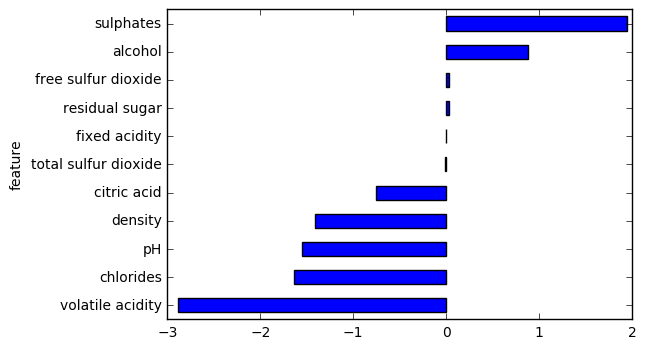

In [274]:
from sklearn.linear_model import LogisticRegression
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
LogReg = LogisticRegression()
LogReg.fit(redwine[x_columns], redwine["quality_low_high"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, LogReg.coef_[0])])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)

* ワインの質に好影響
  * alcohol(アルコール)
  * sulphates (硫酸カリウム濃度)
* ワインの質に悪影響
  * pH
  * density (密度)
  * chlorides (塩化ナトリウム濃度)
  * citric acid (クエン酸濃度)
  * volatile acidity (酢酸濃度)

#### クロスバリデーションで精度を確認する

In [275]:
cross_val_score(LogReg, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy").mean()

0.73233934169278991

## ワインの質を回帰分析する
それぞれのデータがワインの質3,4,5,6,7,8にあてはまるようにモデリングする

### 回帰木を作る

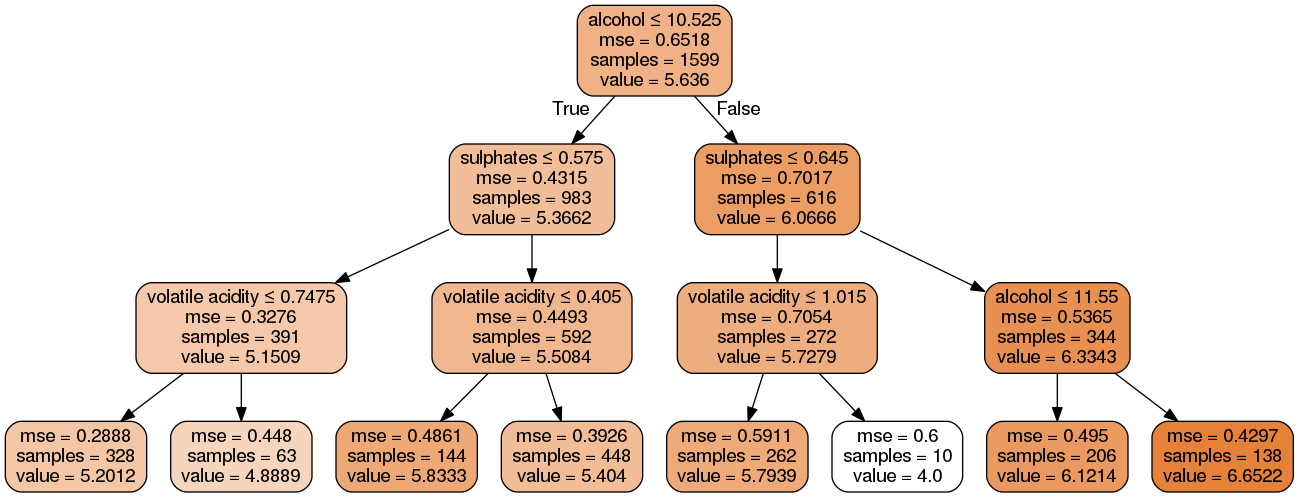

In [276]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
reg = tree.DecisionTreeRegressor(max_depth=3)
reg.fit(redwine[x_columns], redwine["quality"])
dot_data = StringIO()
tree.export_graphviz(reg, out_file=dot_data,
                     feature_names=x_columns,  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### クロスバリデーションをする
モデルの性能指標には平均二乗誤差(Mean Squared Error, MSE)を利用する。
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y_i} - Y_i)^2$$ 

2 0.526371712531
3 0.484200318584
4 0.489811633773
5 0.49037404939
6 0.514327779985
7 0.575808811636
8 0.605310197892
9 0.642537151501


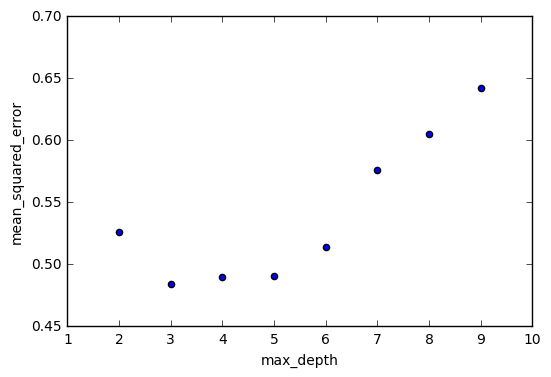

In [277]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    reg = tree.DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
    print(i, -1 * scores.mean())
    tree_param.append((i, -1 * scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "mean_squared_error"]
cv_df.plot(kind="scatter", x="max_depth", y="mean_squared_error")

max_depth(木の深さ)が3の時に最も精度が良い
#### 変数の重要度

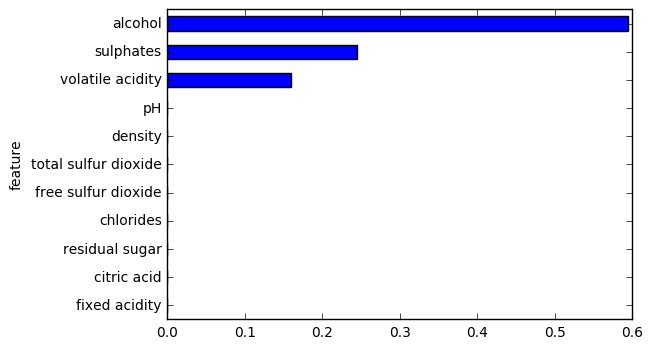

In [278]:
reg = tree.DecisionTreeRegressor(max_depth=3)
reg.fit(redwine[x_columns], redwine["quality"])
feature_importance = pd.DataFrame([i for i in zip(x_columns, reg.feature_importances_)])
feature_importance.columns = ["feature", "importance"]
feature_importance.sort_values("importance", ascending=True).plot(kind="barh", x="feature", y="importance",legend=False)

#### 誤差の絶対値
真値と予測値の誤差の絶対値を下記のグラフにした。
多くのケースで予測値が1ずれる程度に収まっている。

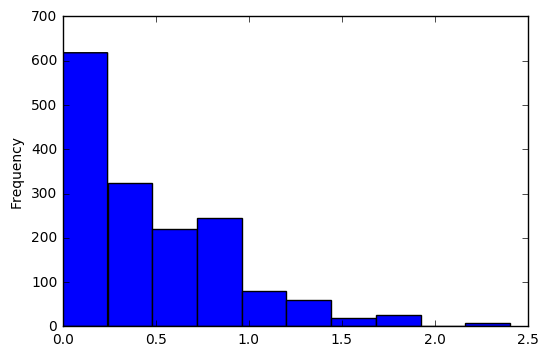

In [279]:
predict = pd.DataFrame.from_dict({"quality":redwine["quality"],
                                  "predict":reg.predict(redwine[x_columns])})
predict["error"] = abs(predict["quality"] - predict["predict"])
predict["error"].plot(kind="hist")

### 重回帰分析
$$y = a + \beta_1 * x_1 + \cdots + \beta_k * x_k$$

0.436629388032


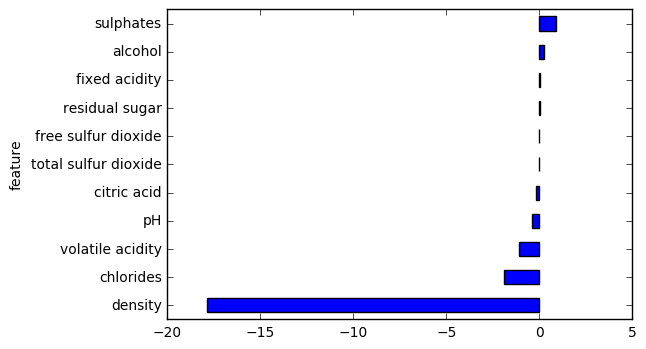

In [280]:
from sklearn import linear_model
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
reg = linear_model.LinearRegression()
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.coef_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)
scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
print(-1 * scores.mean())

回帰木よりも精度が出ている。densityに対する偏回帰係数のみが極端なのが気になる。

#### 予測誤差の可視化
多くの場合において、誤差が1以内になっている。

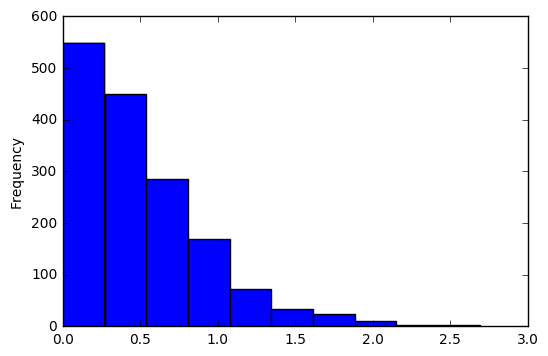

In [281]:
predict = pd.DataFrame.from_dict({"quality":redwine["quality"],
                                  "predict":reg.predict(redwine[x_columns])})
predict["error"] = abs(predict["quality"] - predict["predict"])
predict["error"].plot(kind="hist")

#### リッジ回帰
$(y - X \theta)^t ( y - X \theta ) + \lambda \theta^t \theta$
を最小にするモデル。

重回帰式に正則化項を加えて、モデルのバイアスバリアンスを調整出来るようになっている。
パラメータが大きいと高バイアス-低バリアンスに，小さいと低バイアス-高バリアンスになる。(参考: http://ibisforest.org/index.php?リッジ回帰)

![](bias_variance.png)
上図は、http://scott.fortmann-roe.com/docs/BiasVariance.html より引用


リッジ回帰については、[Computer Science and Artificial Intelligence Laboratory Technical Report](http://cbcl.mit.edu/projects/cbcl/publications/ps/MIT-CSAIL-TR-2007-025.pdf)や[The Elements of  Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/)が参考になります。

0.0 0.436629388032
0.1 0.43587918619
0.2 0.435922799792
0.3 0.435982009764
0.4 0.436050628718
0.5 0.436124627199
0.6 0.436201269123
0.7 0.4362786852
0.8 0.436355603634
0.9 0.436431170186


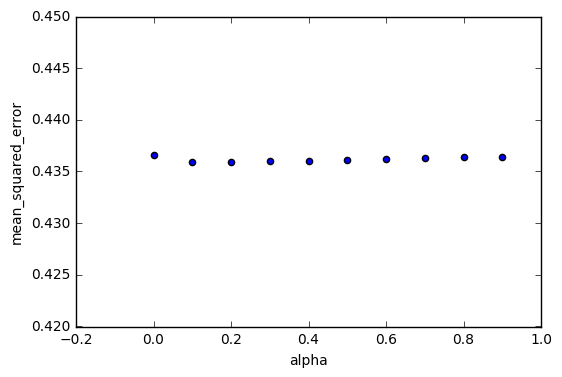

In [282]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in np.arange(0, 1, 0.1):
    reg = linear_model.Ridge(alpha = i)
    scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
    print(i, -1 * scores.mean())
    tree_param.append((i, -1 * scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["alpha", "mean_squared_error"]
cv_df.plot(kind="scatter", x="alpha", y="mean_squared_error")

0.9 0.43587918619


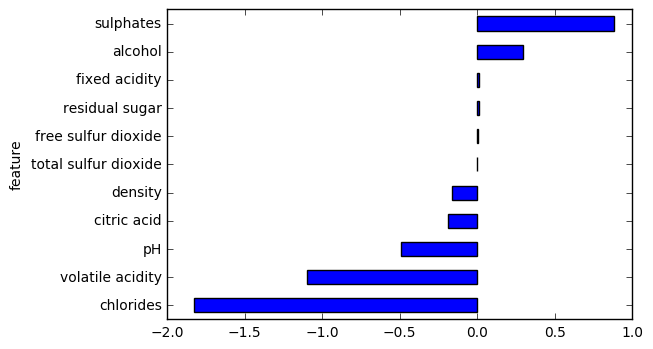

In [283]:
reg = linear_model.Ridge(alpha = 0.1)
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.coef_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)
scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
print(i, -1 * scores.mean())

リッジ回帰によりモデルの複雑さを調整できるようになったので、重回帰式よりも僅かに精度が向上している。
また、係数の解釈もしやすくなっている。

# 高精度なモデルを構築する
## ランダムフォレストでモデリング
web上にある解説では、 http://www.slideshare.net/hamadakoichi/tree-basedmodelsandrandomforests が分かりやすいです。

決定木を多数作って、その平均値を利用するモデルです。


In [284]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6]
}
gs = GridSearchCV(reg,
                  params,
                  cv=5,
                  scoring="mean_squared_error",
                  n_jobs=1,
                  verbose=1)
gs.fit(redwine[x_columns], redwine["quality"])
print(-gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   27.9s finished


0.414269155129
{'max_depth': 6, 'n_estimators': 200}


リッジ回帰での平均二乗誤差が「0.435」だったので、ランダムフォレストの方が高精度になっている。
また、決定木と同様に変数の重要度を確認することができる。

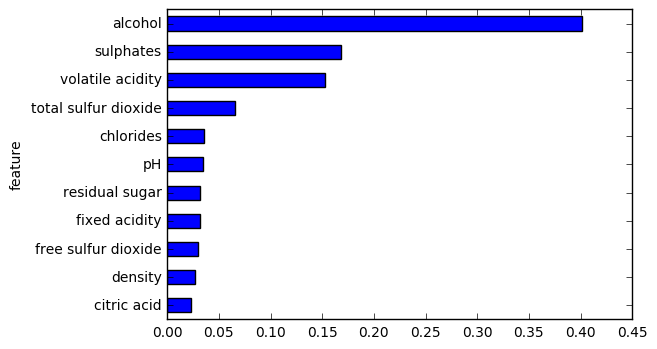

In [285]:
reg = gs.best_estimator_
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.feature_importances_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)

## xgboostでモデリング
アルゴリズムについては、http://xgboost.readthedocs.io/en/latest/model.html が参考になります。
ライブラリの使い方は、 http://yag.xyz/blog/2015/08/08/xgboost-python/ によくまとまっています。

ランダムフォレストでは複数の決定木の平均値を用いるのに対して、
xgboost(gradient boosted tree)は逐次的に学習するモデルで、前回の予測結果を利用して新たなモデルを作ります。


In [286]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
params={'max_depth': [2, 3, 4, 5, 6],
        'subsample': [0.5],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300],
}
reg = xgb.XGBRegressor()
gs = GridSearchCV(reg,
                  params,
                  cv=5,
                  scoring="mean_squared_error",
                  n_jobs=1,
                  verbose=1)
gs.fit(redwine[x_columns], redwine["quality"])
print(gs.best_params_)
print(- gs.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   14.7s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   37.9s


{'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'n_estimators': 100, 'subsample': 0.5}
0.411201635054


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:  1.0min finished


xgboostでモデリングした方が高精度になっている。

パラメータの探索を決め打ちするよりもランダムにする方が実用上良いと言われている。

In [292]:
param_distributions={'max_depth': sp.stats.randint(1,11),
                     'subsample': sp.stats.uniform(0.1,0.9),
                     'colsample_bytree': sp.stats.uniform(0.1,0.9),
                     'learning_rate': [0.1, 0.2, 0.3],
                     'n_estimators': [100, 200, 300],
}
reg = xgb.XGBRegressor()
rs = RandomizedSearchCV(reg,
                        param_distributions,
                        cv=5,
                        n_iter=1000,
                        scoring="mean_squared_error",
                        n_jobs=1,
                        verbose=1,
                        random_state=71)
rs.fit(redwine[x_columns], redwine["quality"])
print(- rs.best_score_)
print(rs.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   22.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   45.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:  3.8min
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:  6.4min
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:  7.8min


0.40900332129
{'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.424448123947068, 'n_estimators': 100, 'subsample': 0.5042098761428097}


[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:  9.5min
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  9.5min finished


探索回数をランダムにして回数自体を増やすことによって、さらに精度が向上している

## 複数のモデルを組み合わせる
一つの学習器に頼るのではなく、複数を組み合わせることによって精度向上を期待する

以下は簡単な例として、回帰木とリッジ回帰の平均値を予測とするモデルになっている。

In [288]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.cluster import KMeans

class TreeRidge(BaseEstimator, RegressorMixin):
    def __init__(self,
                 alpha=1.0,
                 max_depth=3):
        self.alpha = alpha
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = tree.DecisionTreeRegressor(max_depth=self.max_depth)
        self.tree.fit(X, y)
        self.Ridge = linear_model.Ridge(alpha = self.alpha)
        self.Ridge.fit(X, y)
        return self

    def predict(self,X):
        predict1 = self.tree.predict(X)
        predict2 = self.Ridge.predict(X)
        return (predict1 + predict2)/2

In [291]:
parameters = {'alpha': sp.stats.uniform(0.1, 1),
              'max_depth': sp.stats.randint(2, 5)}
reg = RandomizedSearchCV(TreeRidge(),
                   parameters,
                   cv=5,
                   n_iter=100, 
                   verbose=1,
                   scoring="mean_squared_error")
reg.fit(redwine[x_columns],redwine["quality"])
print(reg.best_estimator_)
print(-reg.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    3.3s


TreeRidge(alpha=0.16024420394505015, max_depth=4)
0.434157328564


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished


回帰木やリッジ回帰の単体を用いる場合よりも精度が上がっている。このように複数のモデルの結果を利用して予測する事をスタッキングと呼ばれ、機械学習コンペで頻繁に利用される。

# ノーフリーランチ定理
「すべての識別問題に対して、ほかの識別器より識別性能がよい識別器は存在しない」

という事を主張している定理。

![](NoFreeLunch.gif)
https://ja.wikipedia.org/wiki/%E3%83%8E%E3%83%BC%E3%83%95%E3%83%AA%E3%83%BC%E3%83%A9%E3%83%B3%E3%83%81%E5%AE%9A%E7%90%86　より引用


解きたい問題がある場合は、その問題特有のモデルが最適になる。いつも一番になるような学習器はないという事を意味している。
問題が特定されても一つのモデルでは良い性能が出ない場合があるので、ランダムフォレストやxgboost、スタッキングのような複数のモデルを利用する時がある。


参考: はじめてのパターン認識, 平井有三, 森北出版株式会社, 2012年

# 最後に
赤ワインのデータを例にデータの理解及び予測モデルの構築をしてきました。教師あり学習をする際のモデリングには大きく2パターンあり、データを理解するためと高精度な予測を目的とするものです。自然言語処理や画像処理を必要としないの教師あり学習の場合の多くは、上記の手法を利用することで解決出来ます。機械学習を使って新しいサービスや機能を提供するときに役立てば幸いです。

# 課題
## 予測したい問題とその理由(必須課題)
文字数は自由です。
実際に予測した結果があるとより好ましい。

## redwineのquality予測する高精度なモデルを作りなさい(自由課題)
* jupyter notebookで再現可能な状態で提出すること
* 5-foldのクロスバリデーションでmean_squared_errorを評価する。
* xgboostのパラメータチューニングした0.409を下回れば凄い

# 提出期限
11月7日 10:00まで

# 提出先
atsushi_hayakawa@r.recruit.co.jp

# さらに勉強したい人へ
いつでも読めると便利なので、web上で閲覧できるものに限定しています。

## 情報が纏まっているサイト
* 統計・データ解析 (https://oku.edu.mie-u.ac.jp/~okumura/stat/)
* 21世紀の統計学(http://park.itc.u-tokyo.ac.jp/atstat/jss75shunen/)
* Rによるデータサイエンス(https://www1.doshisha.ac.jp/~mjin/R/ , https://www.amazon.co.jp/dp/4627096011)
* はてな研修用教科書(https://github.com/hatena/Hatena-Textbook)
* 時系列解析の入門に良い資料の紹介記事(http://blog.gepuro.net/archives/123)
* The Elements of  Statistical Learning(http://statweb.stanford.edu/~tibs/ElemStatLearn/)
* An Introduction to Statistical Learning with Applications in R(http://www-bcf.usc.edu/~gareth/ISL/)
* scikit learn(http://scikit-learn.org/stable/)、各手法にリファレンスが載っているので参考になる

## おすすめのブログ
* 盆栽日記 (http://d.hatena.ne.jp/dichika/)
* My Life as a Mock Quant (http://d.hatena.ne.jp/teramonagi/)
* ほくそ笑む (http://d.hatena.ne.jp/hoxo_m/)
* 捨てられたブログ (http://blog.recyclebin.jp)
* 300億円欲しい (http://gg-hogehoge.hatenablog.com)
* 驚異のアニヲタ社会復帰への道 (http://d.hatena.ne.jp/MikuHatsune/)
* まだ厨二病 (http://uribo.hatenablog.com)
* Technically, technophobic. (http://notchained.hatenablog.com)
* 僕らはRを愛しすぎてる (http://wakuteka.hatenablog.jp/)
* iAnalysis ～おとうさんの解析日記～ (http://d.hatena.ne.jp/isseing333/)
* INPUTしたらOUTPUT! (http://estrellita.hatenablog.com)
* gepulog (http://blog.gepuro.net)
* R-bloggers (https://www.r-bloggers.com)

## 勉強会
* R勉強会＠東京 - Tokyo.R (https://groups.google.com/forum/#!forum/r-study-tokyo)
* データマイニング+WEB＠東京 (TokyoWebmining) (https://groups.google.com/forum/#!forum/webmining-tokyo)
* PyData.Tokyo (http://pydatatokyo.connpass.com)
* 統計的学習の基礎読書会 (http://kasutera.connpass.com)
* Japan.R (http://japanr.net)

## Slack
技術に関する質問をしたり、答えたりしています。
* r-wakalang (https://r-wakalang.slack.com)
* PyData-JP (https://pydata-jp.slack.com)

# 資料の利用について
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />この 作品 は <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">クリエイティブ・コモンズ 表示 4.0 国際 ライセンスの下に提供されています。</a>